In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [48]:
#a)
#Your code:
df = pd.DataFrame(pd.read_csv('kc_house_data.csv'))
df.head()
#Hint: read_csv(), head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [49]:
#b) 

print(df.columns)
house_categorical_df = [
    'id', 'waterfront', 'view', 'condition', 'grade', 'zipcode'
]
house_numerical_df = [
    'date', 'price', 'bathrooms', 'bedrooms', 'floors', 'lat', 'long', 
    'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 
    'sqft_lot', 'sqft_lot15', 'yr_built', 'yr_renovated', 
]

print(f'Categorical variables: {house_categorical_df}')
print(f'Numerical variables: {house_numerical_df}')


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
Categorical variables: ['id', 'waterfront', 'view', 'condition', 'grade', 'zipcode']
Numerical variables: ['date', 'price', 'bathrooms', 'bedrooms', 'floors', 'lat', 'long', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'yr_built', 'yr_renovated']


In [50]:
#c)
#Your code:
df[house_numerical_df].describe()
#Hint: Function describe()

,price,bathrooms,bedrooms,floors,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,yr_built,yr_renovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2.114757,3.370842,1.494309,47.560053,-122.213896,1788.390691,291.509045,2079.899736,1986.552492,1.510697e+04,12768.455652,1971.005136,84.402258
std,3.671272e+05,0.770163,0.930062,0.539989,0.138564,0.140828,828.090978,442.575043,918.440897,685.391304,4.142051e+04,27304.179631,29.373411,401.679240
min,7.500000e+04,0.000000,0.000000,1.000000,47.155900,-122.519000,290.000000,0.000000,290.000000,399.000000,5.200000e+02,651.000000,1900.000000,0.000000
25%,3.219500e+05,1.750000,3.000000,1.000000,47.471000,-122.328000,1190.000000,0.000000,1427.000000,1490.000000,5.040000e+03,5100.000000,1951.000000,0.000000
50%,4.500000e+05,2.250000,3.000000,1.500000,47.571800,-122.230000,1560.000000,0.000000,1910.000000,1840.000000,7.618000e+03,7620.000000,1975.000000,0.000000
75%,6.450000e+05,2.500000,4.000000,2.000000,47.678000,-122.125000,2210.000000,560.000000,2550.000000,2360.000000,1.068800e+04,10083.000000,1997.000000,0.000000
max,7.700000e+06,8.000000,33.000000,3.500000,47.777600,-121.315000,9410.000000,4820.000000,13540.000000,6210.000000,1.651359e+06,871200.000000,2015.000000,2015.000000


    Note: Some of the variables aren't meaningful - for example:
   1. Count describes how many records are in the dataset - meaningless when it comes to analysing
   2. Year of renovation is '0' when the renovation didn't happen so it will likely disturb the information that we want to achieve by analysing the std, mins etc. If we wanted to analyze the dataset taking into consideration the year of renovation we would simply remove all records containing 0 as the year renovation and then think of patterns when it comes to why and when the renovation takes place (for example after X years after building)
   3. Some of the data - bathrooms/bedrooms for example can suprise - if we take a look at the minimum of the bathrooms/bedrooms we can see that some of the home sold didn't have any or maybe they didn't qualify as them.
   4. One thing I found really interesting is that the sqft_basement stat has a '0' at 50% percentile - meaning that half or more houses don't have a basement.


## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

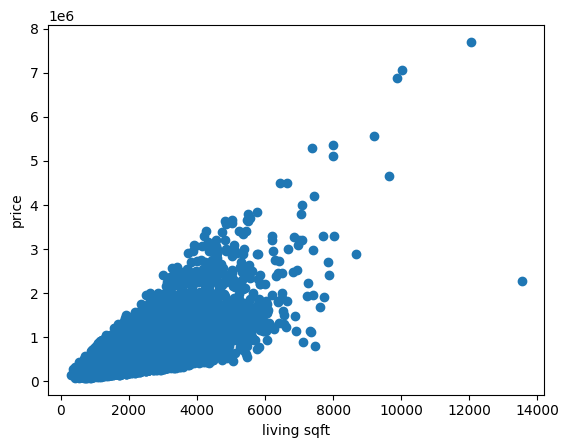

In [51]:
#a)
#Your code:
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('living sqft')
plt.ylabel('price') 
plt.show()
#Hint plt.scatter

    Note: 
The scatter plot shows us that there isn't a big correlation when it comes to square footage of the apartments interior living space and price - simply because there are more variables affecting the price of the house.

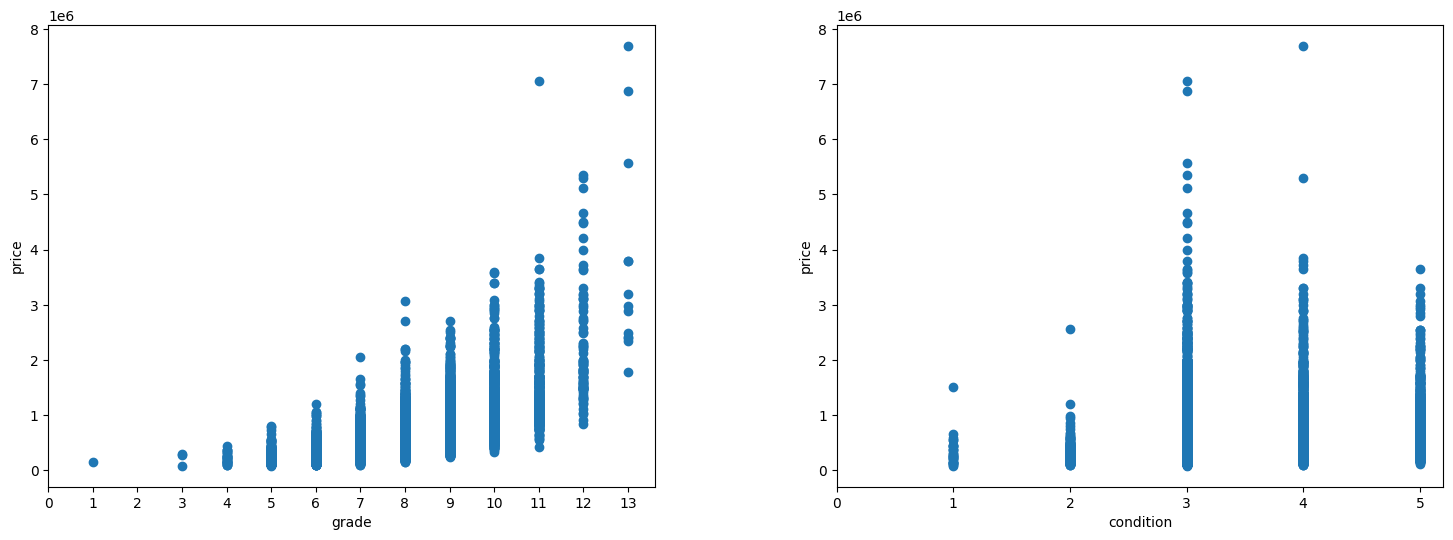

In [52]:
#b)
#Your code:

plt.figure(figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 1)
plt.scatter(df['grade'], df['price'])
plt.xlabel('grade')
plt.ylabel('price')
plt.xticks(np.arange(0,14, step=1))

plt.subplot(1, 2, 2)
plt.scatter(df['condition'], df['price'])
plt.xlabel('condition')
plt.ylabel('price')
plt.xticks(np.arange(0,6, step=1))
plt.show()

    Note:
1) We can see a big correlation when it comes to price and grade - when the grade of the house increases the price also increases. In some cases we can see that the house is overpriced (e.g the house with grade 11 that costs over 7 mil, when most of the houses are in the price point of 0.5-4 mil)
2) There aren't many houses with grade 13 but with the data we got we can see that the trend continues and the minimum/maximum price still increases.
3) The condition of a house doesn't have a strong correlation with a price of a house, but from the data we can see that most of the low condition houses are low-priced ones. Weirdly the minimum price for each condition level doesn't change - we can buy a house with condition 1 and 5 with almost the same money.


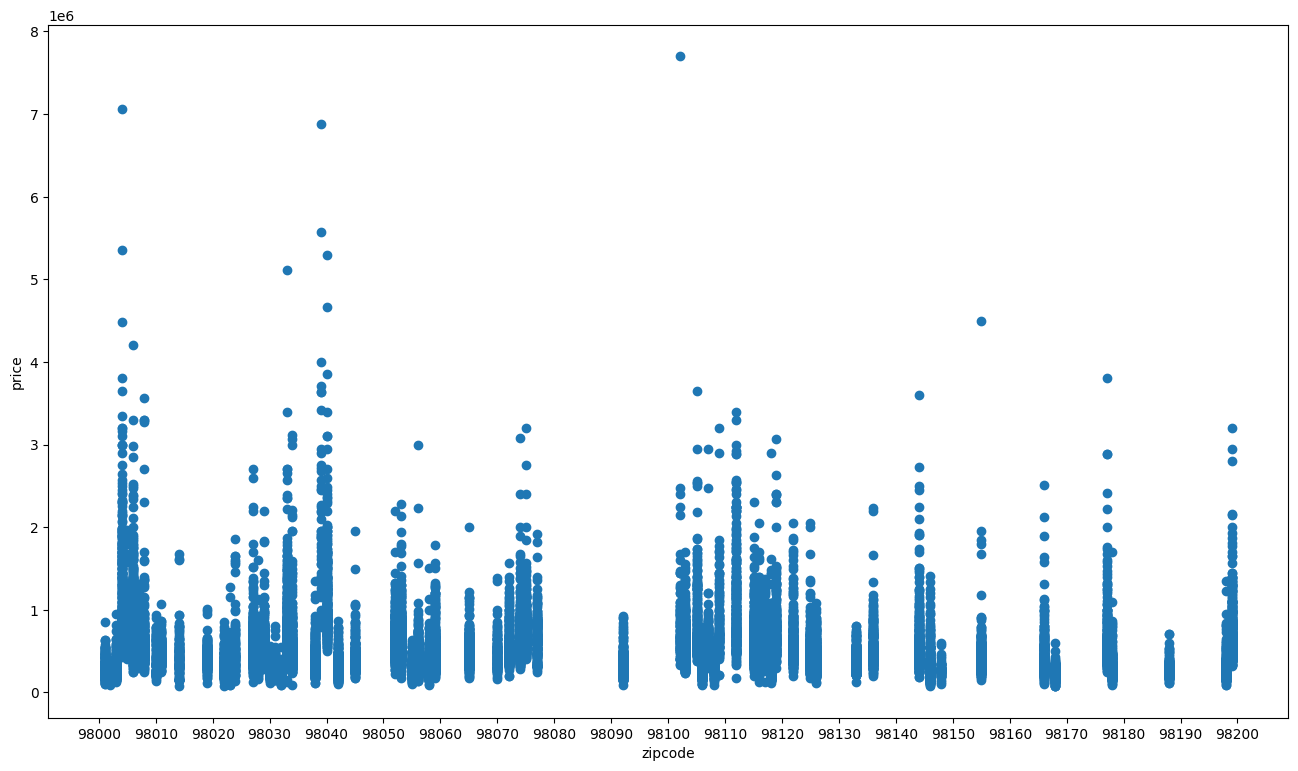

In [53]:
# c)
# Your code:

plt.figure(figsize=(16, 9))
plt.scatter(df['zipcode'], df['price'])
plt.xlabel('zipcode')
plt.ylabel('price')
plt.xticks(np.arange(98000, 98210, step=10))
plt.show()


    Note:
After analyzing the chart we can see that the city is divided into some districts in which the prices are in a specific price point. For example zipcodes around 98090 and 98190 don't have many houses and also the price point of every house is low when compared to houses with zipcodes around 98000-98010. It might be because they are industrial regions.

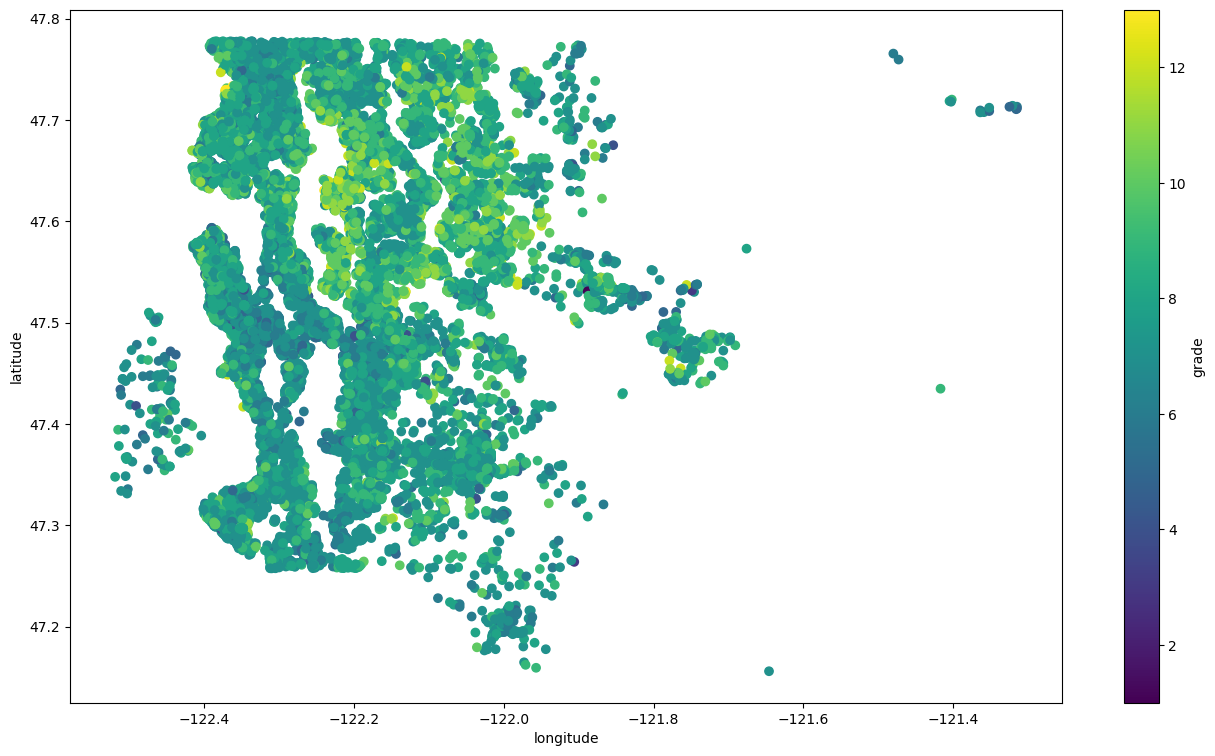

In [54]:
#Your code:
plt.figure(figsize=(16,9)) 
plt.scatter(df['long'], df['lat'], c=df['grade']) 
plt.ylabel('latitude')
plt.xlabel('longitude')
cbar = plt.colorbar()
cbar.set_label('grade')
plt.show() 


    Note:
Using the lat-long plot with grade as the color gives us a rough estimation of the regions of the city in which high-graded houses are most common. For example region of $lat\approx47.6$ and $long\approx-122.2$ has a high condensity of high grade houses - meaning that it could be a city centre of some sort.

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

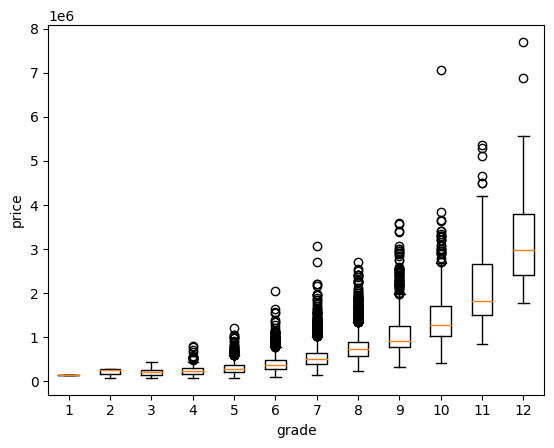

In [55]:
#a)
#Your code:
plt.boxplot(df[['grade', 'price']].groupby('grade')['price'].apply(np.array))
plt.xlabel('grade')
plt.ylabel('price')
plt.show()
#Hint: plt.boxplot

    Note:
The box plot gives us more information about outliners or medians in comparison to the plot from point 2b). We can see that the trend of rising price still aplies, but also the boxplot shows us how big is the amount of outliers - especially when it comes to 5-9 house grade

<Figure size 1600x900 with 0 Axes>

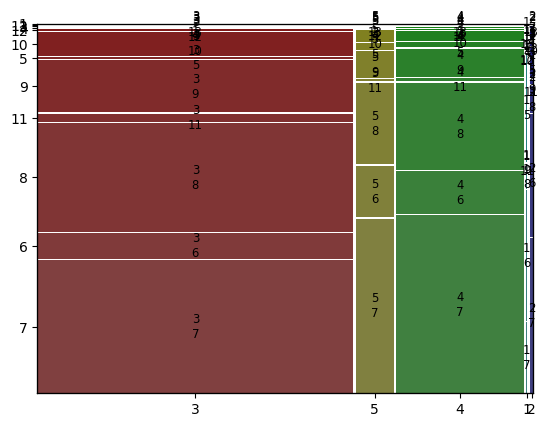

In [56]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

#Your code:
plt.figure(figsize=(16, 9))
mosaic(df, ['condition', 'grade'])
plt.show()

    Note:
Mosaic plot tells us that most of the houses are at condition level of 3 and also that the most quantitive graded are 6,7,8

## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [57]:
#a)
#Your code:
constrained_df = df.loc[
        (df['bedrooms'] == 3) & 
        (df['bathrooms'] == 2) & 
        (df['floors'] == 2)
    ]
constrained_df[house_numerical_df].describe()
#Hint: pandas.DataFrame.loc

,price,bathrooms,bedrooms,floors,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,yr_built,yr_renovated
count,1.540000e+02,154.0,154.0,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,5.144986e+05,2.0,3.0,2.0,47.567376,-122.247091,1717.422078,132.857143,1850.279221,1802.337662,23678.948052,17545.123377,1969.779221,284.863636
std,2.497661e+05,0.0,0.0,0.0,0.143221,0.150507,527.473851,248.092631,547.585413,453.210930,83324.024708,40404.134611,34.654456,700.057328
min,2.090000e+05,2.0,3.0,2.0,47.194700,-122.519000,720.000000,0.000000,1020.000000,850.000000,700.000000,886.000000,1900.000000,0.000000
25%,3.769750e+05,2.0,3.0,2.0,47.498800,-122.361750,1402.500000,0.000000,1452.500000,1452.500000,3414.750000,4020.000000,1942.250000,0.000000
50%,4.640000e+05,2.0,3.0,2.0,47.584750,-122.299500,1625.000000,0.000000,1700.000000,1725.000000,5868.500000,6278.000000,1984.500000,0.000000
75%,5.894625e+05,2.0,3.0,2.0,47.682400,-122.149250,1977.500000,207.500000,2127.500000,2117.500000,10800.250000,10392.250000,1997.500000,0.000000
max,1.755000e+06,2.0,3.0,2.0,47.777000,-121.709000,3650.000000,1120.000000,3650.000000,3170.000000,843309.000000,273992.000000,2014.000000,2014.000000


    Note:
There are 154 (count) houses with 3 bedrooms, 2 bathrooms and 2 floors. The standard deviation is 0.0, meaning we succesfully picked the correct houses.

[]

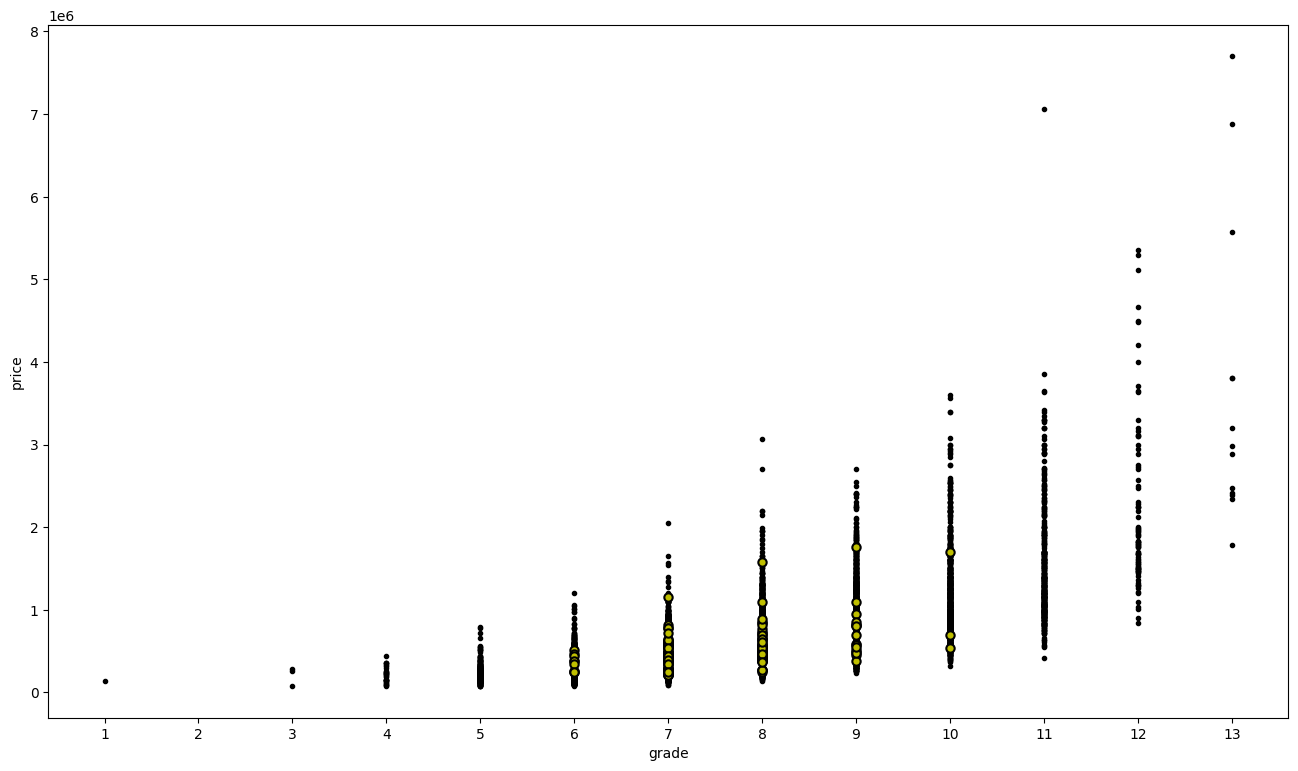

In [58]:
#b)
#Your code:
plt.figure(figsize=(16, 9))
plt.scatter(df['grade'], df['price'], c='k', marker=".")
plt.scatter(constrained_df['grade'], constrained_df['price'], c='y', edgecolors='k', marker="o", linewidths=1.5)
plt.xlabel('grade')
plt.ylabel('price')
plt.xticks(np.arange(0, 14, step=1))
plt.plot()

    Note:
The yellow dots (indicating picked houses with the constraints) are all located between 6 and 10 grade inclusively - which can mean many things, most probable one being the fact that higher grade houses given the fact that they're bigger they also have more bathrooms/bedrooms/floors and the lower grade houses have less of those. If we want to search for houses with those constrains but also taking into consideration the grade of the house the best thing would be to search for the houses with the grades 8-9, both of which have a high amount of houses fulfilling the constraints.

In [59]:
#c)
#Your code:
constrained_df = constrained_df.copy()
constrained_df['price_per_ft'] = constrained_df['price'].div(constrained_df['sqft_living'])
constrained_df.sort_values(by='price_per_ft').head()
#Hint: .loc, .sort_values(), .index

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_ft
9704,7452500565,20140829T000000,260000.0,3,2.0,2710,5000,2.0,0,0,...,2710,0,1951,0,98126,47.5188,-122.373,850,5000,95.940959
11258,7937600262,20140710T000000,379900.0,3,2.0,3110,44967,2.0,0,0,...,3020,90,1999,0,98058,47.4343,-122.082,2150,44967,122.154341
19880,3832050860,20150319T000000,210000.0,3,2.0,1580,4961,2.0,0,0,...,1580,0,2006,0,98042,47.3338,-122.053,2280,5000,132.911392
16014,5104450440,20141113T000000,252500.0,3,2.0,1810,10684,2.0,0,0,...,1810,0,1987,0,98058,47.4619,-122.153,2140,9657,139.502762
20906,3355400242,20141028T000000,274900.0,3,2.0,1936,6612,2.0,0,0,...,1936,0,2014,0,98001,47.2602,-122.246,1620,21600,141.993802


    Note:
The house with id=7452500565 has the best price/sqft of all of the house in the given database and it's equal $\approx$ 95.9$. The 2nd and the 3rd one are a little bit more expensive - 122$ and 132$.